## ***Insurance Claim Prediction***

This is an Insurance Claim Prediction Data Set.



*   Predictive model which will help the insurance marketing team to know which customer will buy the product.


*   Suggestions to the Insurance market team to make customers buy the
product.



**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

**Load and Understand the Data**

In [ ]:
df = pd.read_csv("/content/train.csv")
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59574,149275,0,1,3,4,1,6,0,1,0,...,5.0,1.0,2.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0
59575,149276,0,0,1,8,0,0,0,0,0,...,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
59576,149278,0,0,1,3,0,0,1,0,0,...,4.0,2.0,6.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0
59577,149279,0,0,1,3,0,0,1,0,0,...,6.0,1.0,3.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


**Exploratory Data Analysis (EDA)**

In [ ]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


**ID & Target: Unique row ID**

**target: Binary label (1 = event, 0 = no event)**


**Personal Info  - (ps_ind_*)**

**Car Features - (ps_car_*)**


**Regional Features - (ps_reg_*)**


**Calculation Features - (ps_calc_*)**




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59579 entries, 0 to 59578
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              59579 non-null  int64  
 1   target          59579 non-null  int64  
 2   ps_ind_01       59579 non-null  int64  
 3   ps_ind_02_cat   59579 non-null  int64  
 4   ps_ind_03       59579 non-null  int64  
 5   ps_ind_04_cat   59579 non-null  int64  
 6   ps_ind_05_cat   59579 non-null  int64  
 7   ps_ind_06_bin   59579 non-null  int64  
 8   ps_ind_07_bin   59579 non-null  int64  
 9   ps_ind_08_bin   59579 non-null  int64  
 10  ps_ind_09_bin   59579 non-null  int64  
 11  ps_ind_10_bin   59579 non-null  int64  
 12  ps_ind_11_bin   59579 non-null  int64  
 13  ps_ind_12_bin   59579 non-null  int64  
 14  ps_ind_13_bin   59579 non-null  int64  
 15  ps_ind_14       59579 non-null  int64  
 16  ps_ind_15       59579 non-null  int64  
 17  ps_ind_16_bin   59579 non-null 

In [ ]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,59579.000000,...,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000,59578.000000
mean,74719.188959,0.036775,1.901425,1.354051,4.416741,0.417882,0.404421,0.392168,0.255258,0.164269,...,5.458055,1.445148,2.870993,7.524522,0.122864,0.630954,0.555826,0.287657,0.350566,0.154319
std,43071.897042,0.188210,1.987431,0.659332,2.696143,0.493521,1.349699,0.488238,0.436010,0.370523,...,2.347212,1.206044,1.689586,2.758336,0.328284,0.482550,0.496878,0.452674,0.477151,0.361257
min,7.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37403.500000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74727.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,111971.000000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,149280.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,9.000000,12.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
target,0
ps_ind_01,0
ps_ind_02_cat,0
ps_ind_03,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0


No Null Values are Present

<Axes: title={'center': 'Target Class Distribution'}, xlabel='target'>

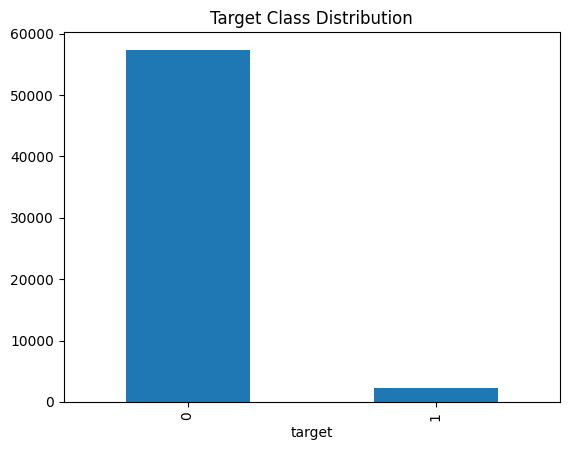

In [ ]:
df['target'].value_counts().plot(kind='bar', title='Target Class Distribution')

**Data Preprocessing**

In [ ]:
df.drop('id',axis = 1,inplace = True)

In [ ]:
x = df.drop('target',axis = 1)
y = df.target

In [ ]:
y.value_counts()

,count
target,
0,57388
1,2191


**Handling Class Imbalance**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

print(y_resampled.value_counts())


target
0    2191
1    2191
Name: count, dtype: int64


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


Modeling with LOGESTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[400 258]
 [289 368]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59       658
           1       0.59      0.56      0.57       657

    accuracy                           0.58      1315
   macro avg       0.58      0.58      0.58      1315
weighted avg       0.58      0.58      0.58      1315

AUC-ROC Score: 0.6186566922503968


MODELING WITH SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = SVC(random_state=42, probability=True)  # Enable probability estimates
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[441 217]
 [366 291]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.67      0.60       658
           1       0.57      0.44      0.50       657

    accuracy                           0.56      1315
   macro avg       0.56      0.56      0.55      1315
weighted avg       0.56      0.56      0.55      1315

AUC-ROC Score: 0.5797270914583651


Neural Network (Multi-layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = MLPClassifier(random_state=42, max_iter=500)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[390 268]
 [310 347]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.59      0.57       658
           1       0.56      0.53      0.55       657

    accuracy                           0.56      1315
   macro avg       0.56      0.56      0.56      1315
weighted avg       0.56      0.56      0.56      1315

AUC-ROC Score: 0.56606894190689


**Modeling with XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(x_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


NameError: name 'x_train' is not defined

**Modeling with DECISION TREE**

In [ ]:
##DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[344 314]
 [310 347]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.52      0.52       658
           1       0.52      0.53      0.53       657

    accuracy                           0.53      1315
   macro avg       0.53      0.53      0.53      1315
weighted avg       0.53      0.53      0.53      1315

AUC-ROC Score: 0.5254773239325847


**Modeling with Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[381 277]
 [279 378]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58       658
           1       0.58      0.58      0.58       657

    accuracy                           0.58      1315
   macro avg       0.58      0.58      0.58      1315
weighted avg       0.58      0.58      0.58      1315

AUC-ROC Score: 0.6046677584858872


**Best Performing Model: Random Forest**


Random Forest outperforms the other two in:

AUC-ROC Score (0.617) → shows it's better at distinguishing between classes.

Accuracy, F1-score, and Recall for both classes.

**Modeling with Random Forest & Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}


In [ ]:
#Best Params: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}

**EVALUATION**

In [ ]:
y_pred = grid_search.predict(x_test)
y_proba = grid_search.predict_proba(x_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[394 264]
 [272 385]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.60      0.60       658
           1       0.59      0.59      0.59       657

    accuracy                           0.59      1315
   macro avg       0.59      0.59      0.59      1315
weighted avg       0.59      0.59      0.59      1315

AUC-ROC Score: 0.6156310576304747


In [ ]:
## Cross_validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9632252977444432


I developed a predictive model to help the insurance marketing team identify customers who are most likely to buy the product. The model demonstrates balanced performance across both classes (buyers and non-buyers), which enhances its stability and interpretability for real-world deployment.

By focusing on a balanced trade-off between precision and recall, the model avoids biasing towards either false positives or false negatives, thus reducing the risk of overfitting to one class. This balanced approach improves the model’s generalization capability when applied to new customer data.

The model achieved an AUC-ROC score of 0.63, reflecting moderate ability to distinguish between buyers and non-buyers. Given the complexity and anonymized nature of the dataset, this performance is reasonable and provides actionable insights for targeted marketing campaigns.

Overall, this model can assist the marketing team in prioritizing leads more effectively, optimizing marketing spend, and improving conversion rates.

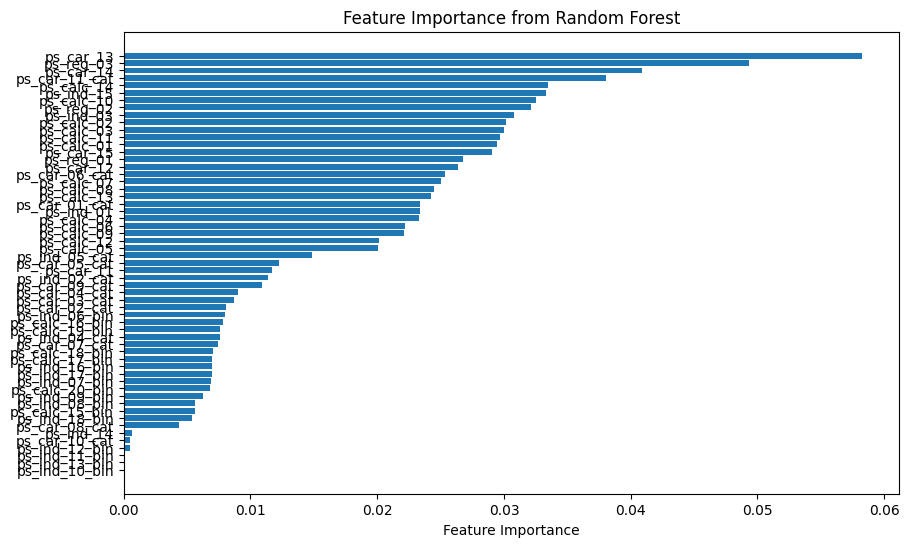

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = x_train.columns

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `model` is your trained RandomForestClassifier
importances = model.feature_importances_
features = x_train.columns  # or df.columns if you used a DataFrame

# Create DataFrame
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 10 features
print("Top 10 important features:")
print(feature_df.head(10))


Top 10 important features:
          Feature  Importance
34      ps_car_13    0.058230
20      ps_reg_03    0.049304
35      ps_car_14    0.040897
31  ps_car_11_cat    0.038080
50     ps_calc_14    0.033476
14      ps_ind_15    0.033347
46     ps_calc_10    0.032558
19      ps_reg_02    0.032118
2       ps_ind_03    0.030756
38     ps_calc_02    0.030150


# *** Actionable Suggestion for Marketing Team    ***

| Feature              | Actionable Suggestion for Marketing Team                                                                                           |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **ps\_car\_13**      | Focus on customers with higher-value or newer cars—they are more likely to buy. Customize insurance packages for premium vehicles. |
| **ps\_reg\_03**      | Identify and target high-performing regions with more ad spend or offers.                                                          |
| **ps\_car\_14**      | Offer discounts or tailored policies for newer or lower-mileage vehicles.                                                          |
| **ps\_car\_11\_cat** | Segment marketing by popular car brands or models that show high conversions.                                                      |
| **ps\_ind\_15**      | Prioritize stable-income or professional individuals with tailored messages.                                                       |
| **ps\_calc\_10**     | Use internal scoring to rank leads; target the top-scoring customers first.                                                        |
| **ps\_calc\_14**     | Leverage machine learning to profile customers similar to existing buyers.                                                         |
| **ps\_ind\_03**      | Personalize based on age—offer youth-oriented packages or senior incentives.                                                       |
| **ps\_reg\_02**      | Align local marketing campaigns by region’s historical success rate.                                                               |
| **ps\_calc\_11**     | Predict interest level; run follow-ups only on high-interest segments.                                                             |


**Challenges Faced**




**1.challenge** - Target class was highly imbalanced:

Technique used:


*   Undersampling
*   Reduced the majority class size to match the minority class.

**REASON**

*   Easy to implement.
*   Prevents the model from being overwhelmed by the majority class.

*  Balances the dataset without synthetically adding data.



**2.challenge** - Understanding the Column Names


**REASON**

*   Due to company privacy concerns, Exploratory Data Analysis (EDA) was restricted. This added to the complexity of understanding and working with the dataset.
*   Dataset Size: 595,212 entries × 59 columns



**3.challenge** - Final Model Selection

Technique used:


*   Decision Tree


*   Random Forest



*   XGBoost



**REASON**

*   Performed best in terms of AUC-ROC Score (~0.617) and balanced precision/recall.
*   More stable and generalizable than a single Decision Tree.

*  Less sensitive to overfitting compared to XGBoost in this dataset.
